In [111]:
import pandas as pd
import os

### Import Data

In [61]:
neighborhood_data = pd.read_csv("../../data/reddit/gpt_sentiment_with_neighborhoods_split.csv")

neighborhood_data['date'] = pd.to_datetime(neighborhood_data[['year','month']].assign(day=1))

neighborhood_data.head()

,comment_id,submission_id,comment_text,year,month,sentiment_score,neighborhoods_mentioned,thread_text,tenleytown,columbia heights,...,capitol hill,se,eotr,west end,woodley park,anacostia,shaw,south east,north east,date
0,jadkvdl,11e8jyj,yep. i've seen more go down at stores in sw an...,2023,2,4,"navy yard, sw",NaN,0,0,...,0,0,0,0,0,0,0,0,0,2023-02-01
1,gzixvn7,nljeif,my office is located in noma and we received a...,2021,5,3,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01
2,gzixppj,nljeif,"i mean, noma has been like this for a while. a...",2021,5,2,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01
3,gzjrh9w,nljeif,i recently moved to noma this year so i wouldn...,2021,5,3,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01
4,gzjfj9w,nljeif,"been in noma for 3 years, and it's definitely ...",2021,5,3,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01


In [46]:
neighborhood_data.shape

(4067, 44)

In [52]:
home_prices = pd.read_csv("../../data/zillow_house_values.csv")

home_prices['EndMonth'] = pd.to_datetime(home_prices['EndMonth'])
home_prices['EndMonth'] = home_prices['EndMonth'].apply(lambda x: x.replace(day=1))

home_prices.head()

,RegionName,State,City,EndMonth,MedianHomeValue
0,Columbia Heights,DC,Washington,2019-01-01,599525.939267
1,Capitol Hill,DC,Washington,2019-01-01,819029.545400
2,Petworth,DC,Washington,2019-01-01,593648.793579
3,Adams Morgan,DC,Washington,2019-01-01,548296.629400
4,Shaw,DC,Washington,2019-01-01,757805.290735


In [118]:
files = os.listdir("../../data/open_data_dc")
files = [file for file in files if file.endswith("neighborhood.csv")]

In [122]:
crime = pd.read_csv("../../data/open_data_dc/" + files[0])
crime.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,...,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,geom,Name
0,0,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,...,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,635657969,NaN,POINT (-76.9995323037 38.8292044165),Washington Highlands
1,1,399950.92,138510.6000,23168245,2024/05/09 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1800 - 1829 BLOCK OF 4TH STREET NE,399950.920000,...,Precinct 75,38.914461,-77.000566,NaN,2023/10/12 10:40:00+00,2023/10/12 11:45:00+00,635932226,NaN,POINT (-77.0005659184 38.9144610842),Eckington
2,2,404689.01,135000.8400,24000194,2024/01/01 11:50:13+00,MIDNIGHT,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF E STREET SE,404689.010000,...,Precinct 103,38.882831,-76.945957,NaN,2024/01/01 10:54:00+00,2024/01/01 11:40:00+00,635932616,NaN,POINT (-76.9459571922 38.882831399),Fort Dupont
3,3,401508.58,137047.0200,24000222,2024/01/01 13:56:32+00,DAY,OTHERS,THEFT/OTHER,812 - 899 BLOCK OF BLADENSBURG ROAD NE,401508.580000,...,Precinct 79,38.901275,-76.982608,NaN,2024/01/01 13:39:00+00,2024/01/01 13:50:00+00,635932617,NaN,POINT (-76.9826084878 38.9012753565),Trinidad
4,4,393930.75,143053.2700,24000236,2024/01/01 14:59:02+00,DAY,OTHERS,THEFT/OTHER,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,...,Precinct 138,38.955362,-77.070022,NaN,2024/01/01 13:51:00+00,2024/01/01 13:54:00+00,635932618,NaN,POINT (-77.0700218345 38.9553618526),Wakefield


### Get Top Mentioned Neighborhoods 

In [62]:
neighborhood_data_ONLY = neighborhood_data[neighborhood_data.columns[7:]]
neighborhood_data_ONLY.head()

,thread_text,tenleytown,columbia heights,ne,navy yard,dupont,ch,georgetown,se,the palisades,...,capitol hill,se,eotr,west end,woodley park,anacostia,shaw,south east,north east,date
0,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-02-01
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021-05-01


In [63]:
neighborhood_totals = neighborhood_data_ONLY.iloc[:, 1:].sum()  # Exclude the first column if it's not numeric
top_15 = neighborhood_totals.sort_values(ascending=False)[0:15]
top_15

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [50]:
cols_to_keep = list(neighborhood_data.columns[:7]) + list(top_15.index)
top_15_df = neighborhood_data[cols_to_keep]
top_15_df.head()

,comment_id,submission_id,comment_text,year,month,sentiment_score,neighborhoods_mentioned,navy yard,noma,u street,...,h street,petworth,capitol hill,shaw,adams morgan,logan circle,georgetown,anacostia,downtown,takoma
0,jadkvdl,11e8jyj,yep. i've seen more go down at stores in sw an...,2023,2,4,"navy yard, sw",1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,gzixvn7,nljeif,my office is located in noma and we received a...,2021,5,3,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,gzixppj,nljeif,"i mean, noma has been like this for a while. a...",2021,5,2,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,gzjrh9w,nljeif,i recently moved to noma this year so i wouldn...,2021,5,3,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,gzjfj9w,nljeif,"been in noma for 3 years, and it's definitely ...",2021,5,3,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Analyis Per Neighborhood

In [8]:
# Check out the overall sentiment stats for each top neighborhood

average_sentiments = []

for i,neighborhood in enumerate(top_15.index):
    
    avg_s = top_15_df[top_15_df[neighborhood] == 1]['sentiment_score'].mean()
    max_s = top_15_df[top_15_df[neighborhood] == 1]['sentiment_score'].max()
    min_s = top_15_df[top_15_df[neighborhood] == 1]['sentiment_score'].min()
    range_s = max_s - min_s

    average_sentiments.append([neighborhood,avg_s,max_s,min_s,range_s])
    
average_sentiments_df = pd.DataFrame(average_sentiments,columns=["neighborhood","avg_sentiment","max_sentiment","min_sentiment","range_sentiment"])
average_sentiments_df

,neighborhood,avg_sentiment,max_sentiment,min_sentiment,range_sentiment
0,navy yard,4.226502,9,1,8
1,noma,4.470679,10,1,9
2,u street,4.373585,10,1,9
3,columbia heights,4.266409,10,1,9
4,dupont,5.090361,10,1,9
5,h street,4.540936,9,1,8
6,petworth,4.000000,9,1,8
7,capitol hill,5.003257,10,1,9
8,shaw,4.573333,10,1,9
9,adams morgan,4.498258,9,1,8


In [64]:
# Average Sentiments by month for each neighborhood

avg = []

for neighborhood in top_15.index:

    neighborhood_data = top_15_df[top_15_df[neighborhood] == 1]

    for year in neighborhood_data["year"].unique():

        year_data = neighborhood_data[neighborhood_data["year"] == year]

        for month in year_data["month"].unique():

            month_data = year_data[year_data["month"] == month]

            avg_s = month_data["sentiment_score"].mean()

            avg.append([neighborhood,month,year,avg_s])

average_sentiments_by_month = pd.DataFrame(avg, columns= ["neighborhood","month","year","average_sentiment"])
average_sentiments_by_month

,neighborhood,month,year,average_sentiment
0,navy yard,2,2023,4.000000
1,navy yard,3,2023,5.456140
2,navy yard,11,2023,3.773810
3,navy yard,9,2023,3.500000
4,navy yard,4,2023,3.000000
...,...,...,...,...
522,takoma,8,2021,3.000000
523,takoma,11,2021,7.000000
524,takoma,5,2014,4.000000
525,takoma,8,2014,6.444444


In [65]:
# get sentiment by year 

average_sentiment_by_year = average_sentiments_by_month.groupby(["neighborhood","year"]).mean().drop("month",axis=1).reset_index()
average_sentiment_by_year

,neighborhood,year,average_sentiment
0,adams morgan,2010,5.750000
1,adams morgan,2012,5.000000
2,adams morgan,2016,7.000000
3,adams morgan,2018,6.166667
4,adams morgan,2019,5.666667
...,...,...,...
138,u street,2019,3.825000
139,u street,2021,4.891582
140,u street,2022,8.000000
141,u street,2023,4.322546


In [66]:
# convert date to date
average_sentiments_by_month['date'] = pd.to_datetime(average_sentiments_by_month['year'].astype(str) + '-' + average_sentiments_by_month['month'].astype(str))
average_sentiments_by_month.head()

,neighborhood,month,year,average_sentiment,date
0,navy yard,2,2023,4.00000,2023-02-01
1,navy yard,3,2023,5.45614,2023-03-01
2,navy yard,11,2023,3.77381,2023-11-01
3,navy yard,9,2023,3.50000,2023-09-01
4,navy yard,4,2023,3.00000,2023-04-01


### Sentiment Across Neighborhoods

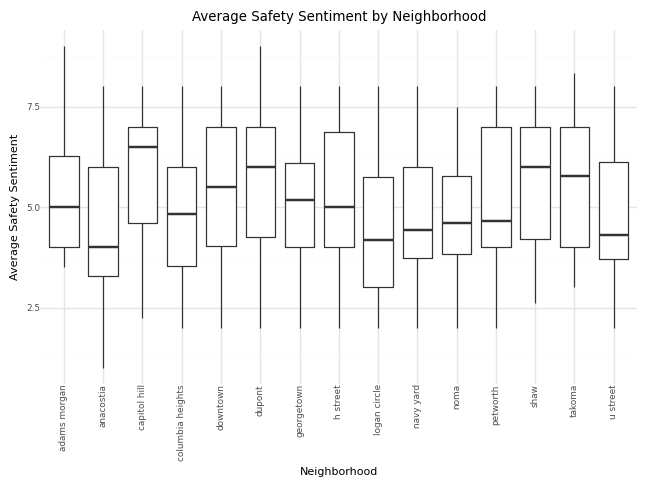

In [67]:
from plotnine import * 

plot = (ggplot(data = average_sentiments_by_month) +
 
  geom_boxplot(aes(x='neighborhood', y='average_sentiment')) + 
  labs(x="Neighborhood", y="Average Safety Sentiment", title="Average Safety Sentiment by Neighborhood", color="Neighborhood") +
  theme_minimal(base_size=8) +
  theme(axis_text_x=element_text(rotation=90)) 

 )

plot.draw()

#plot.save("../../figures/sentiment_by_neighborhood_box.png", dpi=300)

### Get only last 5 years, and fill missing years with Nan

In [68]:
average_sentiments_by_year_2019 = average_sentiment_by_year[average_sentiment_by_year["year"] >= 2019]
average_sentiments_by_year_2019

,neighborhood,year,average_sentiment
4,adams morgan,2019,5.666667
5,adams morgan,2021,5.775000
6,adams morgan,2022,3.750000
7,adams morgan,2023,4.893519
8,adams morgan,2024,4.875923
...,...,...,...
138,u street,2019,3.825000
139,u street,2021,4.891582
140,u street,2022,8.000000
141,u street,2023,4.322546


In [44]:
average_sentiments_by_year_2019.to_csv("../../data/average_sentiments_by_year_2019.csv")

In [36]:
all_years = range(average_sentiments_by_year_2019['year'].min(), average_sentiments_by_year_2019['year'].max() + 1)
all_years

range(2019, 2025)

In [38]:
expanded_df = (
    average_sentiments_by_year_2019.set_index(['neighborhood', 'year'])  # Set multi-index
      .reindex(pd.MultiIndex.from_product(
          [average_sentiments_by_year_2019['neighborhood'].unique(), all_years], names=['neighborhood', 'year']
      ))                                   # Reindex to add missing combinations
      .reset_index()                       # Reset index to get a flat dataframe
)

# Fill missing `average_sentiment` with None
expanded_df['average_sentiment'] = expanded_df['average_sentiment'].where(pd.notna(expanded_df['average_sentiment']), None)

In [40]:
expanded_df

,neighborhood,year,average_sentiment,date
0,adams morgan,2019,5.666667,2019-04-01 12:00:00.000000000
1,adams morgan,2020,NaN,NaT
2,adams morgan,2021,5.775000,2021-07-08 04:48:00.000000000
3,adams morgan,2022,3.750000,2022-03-17 12:00:00.000000000
4,adams morgan,2023,4.893519,2023-07-21 16:00:00.000000000
...,...,...,...,...
85,u street,2020,NaN,NaT
86,u street,2021,4.891582,2021-08-08 18:00:00.000000000
87,u street,2022,8.000000,2022-01-01 00:00:00.000000000
88,u street,2023,4.322546,2023-07-18 20:34:17.142857216


## Plot!

In [18]:
from plotnine import * 
import matplotlib.pyplot as plt

In [69]:
ch = average_sentiments_by_month[average_sentiments_by_month["neighborhood"] == "columbia heights"]
#admo = admo[admo["year"] >= 2019]
ch.head()

,neighborhood,month,year,average_sentiment,date
107,columbia heights,11,2024,6.000000,2024-11-01
108,columbia heights,9,2024,6.333333,2024-09-01
109,columbia heights,5,2024,3.851064,2024-05-01
110,columbia heights,1,2024,3.509804,2024-01-01
111,columbia heights,8,2024,6.666667,2024-08-01


In [70]:
ch_prices = home_prices[home_prices["RegionName"] == "Columbia Heights"]
ch_prices

,RegionName,State,City,EndMonth,MedianHomeValue
0,Columbia Heights,DC,Washington,2019-01-01,599525.939267
7,Columbia Heights,DC,Washington,2019-02-01,599770.951500
14,Columbia Heights,DC,Washington,2019-03-01,601623.412555
21,Columbia Heights,DC,Washington,2019-04-01,603960.848314
28,Columbia Heights,DC,Washington,2019-05-01,605562.134489
...,...,...,...,...,...
483,Columbia Heights,DC,Washington,2024-06-01,638786.079529
491,Columbia Heights,DC,Washington,2024-07-01,634370.181189
499,Columbia Heights,DC,Washington,2024-08-01,630870.528000
507,Columbia Heights,DC,Washington,2024-09-01,630434.535100


In [33]:
ch['year'] = pd.to_numeric(ch['year'], errors='coerce')  # Convert to numeric


/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_54990/3644570553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


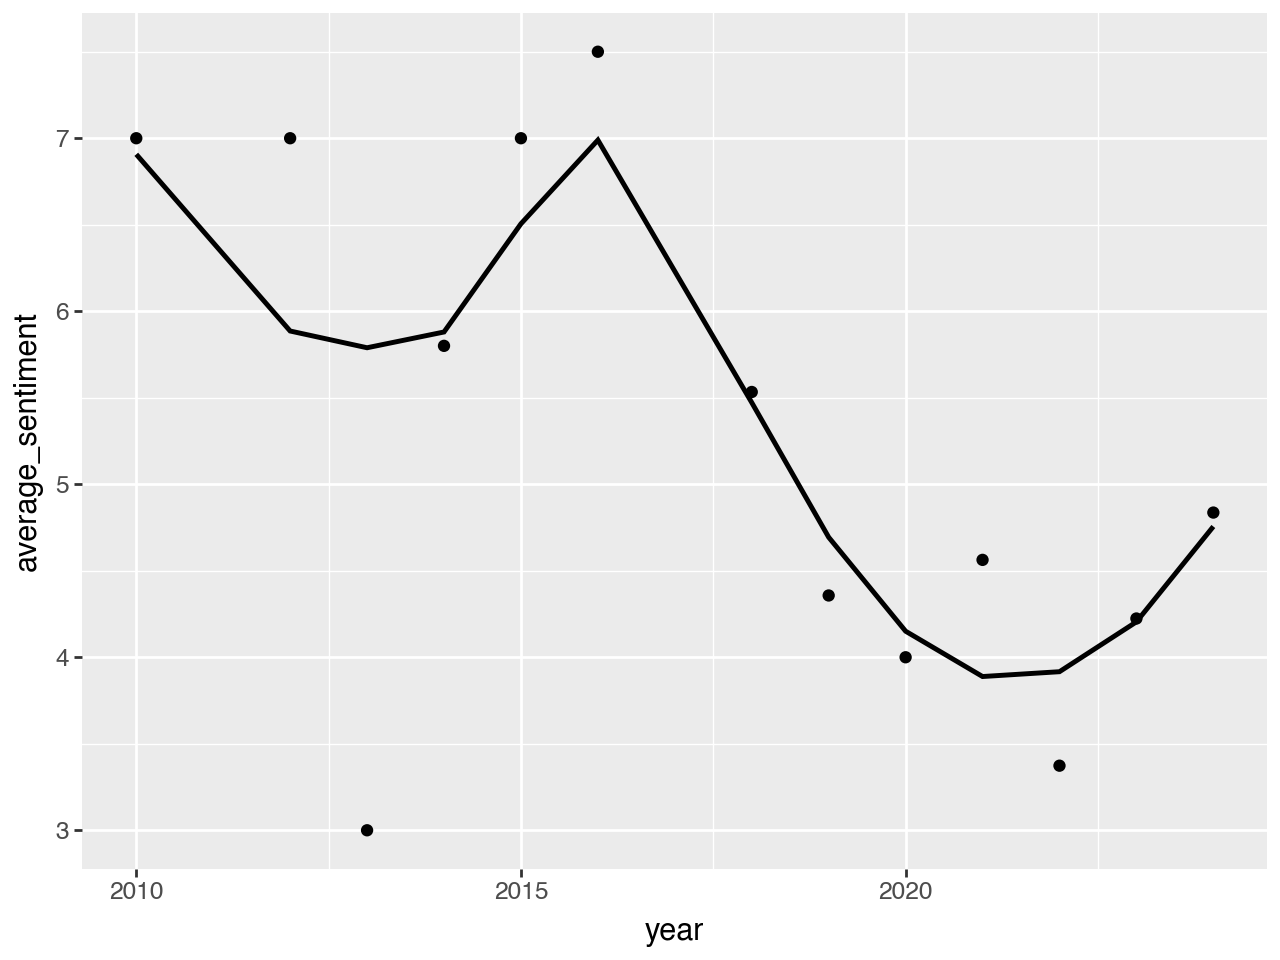

In [23]:
(ggplot(data = ch) +
 
  geom_point(aes(x='year', y='average_sentiment')) + 
 
 geom_smooth(aes(x="year", y="average_sentiment"), method = 'loess', se=False)
 
 )
 

In [24]:
ch_prices['EndMonth'] = pd.to_datetime(ch_prices['EndMonth'])

/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_54990/4138713665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
ch_prices['EndMonth'] = pd.to_datetime(ch_prices['EndMonth'])

/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_54990/4138713665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
ch_prices

,RegionName,State,City,EndMonth,MedianHomeValue
0,Columbia Heights,DC,Washington,2019-01-31,599525.939267
7,Columbia Heights,DC,Washington,2019-02-28,599770.951500
14,Columbia Heights,DC,Washington,2019-03-31,601623.412555
21,Columbia Heights,DC,Washington,2019-04-30,603960.848314
28,Columbia Heights,DC,Washington,2019-05-31,605562.134489
...,...,...,...,...,...
483,Columbia Heights,DC,Washington,2024-06-30,638786.079529
491,Columbia Heights,DC,Washington,2024-07-31,634370.181189
499,Columbia Heights,DC,Washington,2024-08-31,630870.528000
507,Columbia Heights,DC,Washington,2024-09-30,630434.535100


/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_54990/3341963068.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


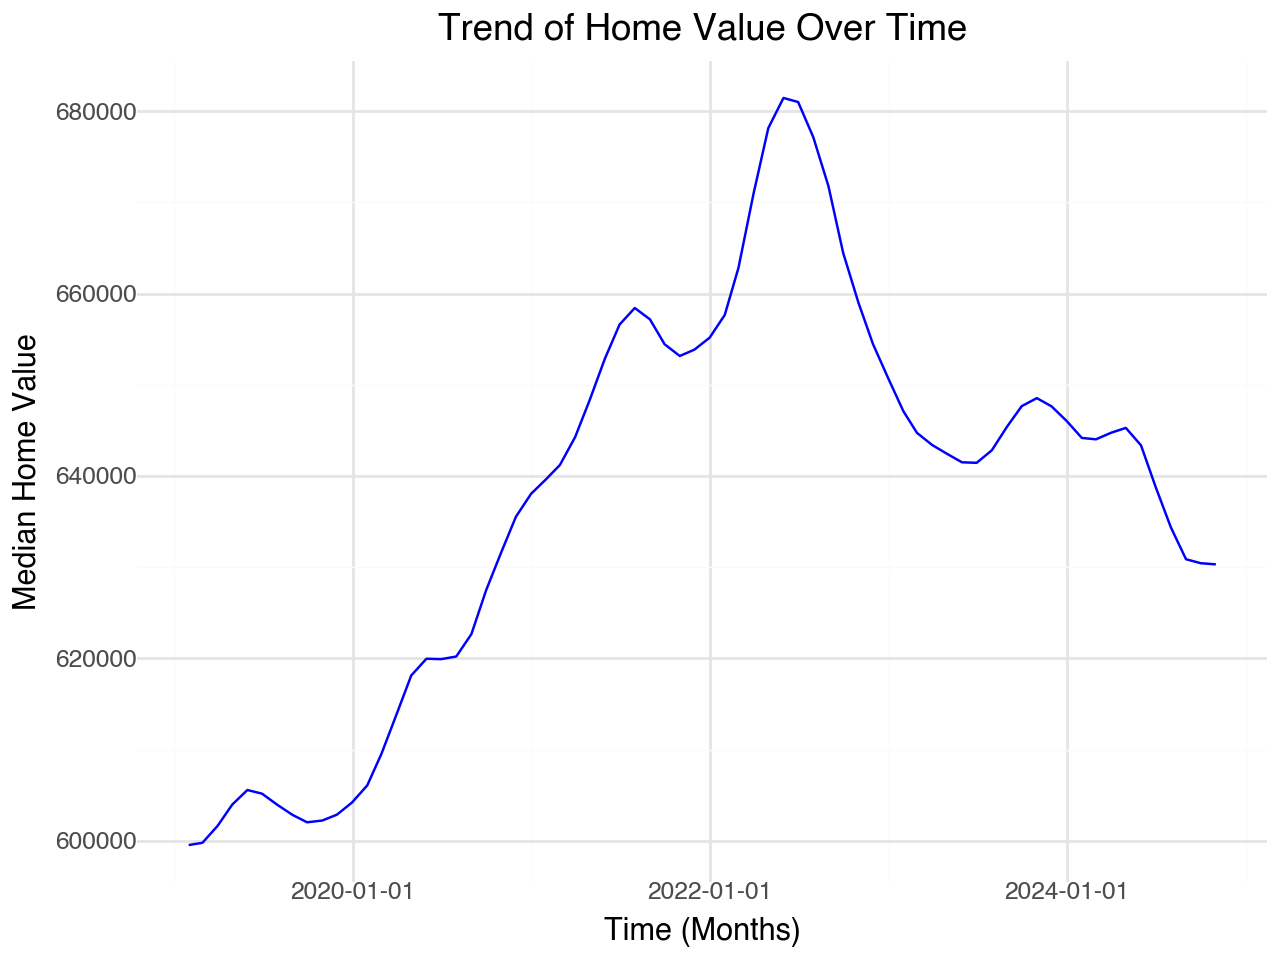

In [40]:
plot = (
    ggplot(ch_prices, aes(x='EndMonth', y='MedianHomeValue')) +
    geom_line(color='blue') +
    labs(
        title='Trend of Home Value Over Time',
        x='Time (Months)',
        y='Median Home Value'
    ) +
    theme_minimal())

print(plot)

### Test

In [71]:
import matplotlib.pyplot as plt

In [72]:
home_prices["RegionName"].unique()

array(['Columbia Heights', 'Capitol Hill', 'Petworth', 'Adams Morgan',
       'Shaw', 'Navy Yard', 'Anacostia', 'NoMa'], dtype=object)

In [129]:
prices = home_prices[home_prices["RegionName"] == "Shaw"]
prices

,RegionName,State,City,EndMonth,MedianHomeValue
4,Shaw,DC,Washington,2019-01-01,757805.290735
11,Shaw,DC,Washington,2019-02-01,756654.623079
18,Shaw,DC,Washington,2019-03-01,757762.974229
25,Shaw,DC,Washington,2019-04-01,760415.516800
32,Shaw,DC,Washington,2019-05-01,762531.247827
...,...,...,...,...,...
487,Shaw,DC,Washington,2024-06-01,787088.674200
495,Shaw,DC,Washington,2024-07-01,782104.711605
503,Shaw,DC,Washington,2024-08-01,778831.634759
511,Shaw,DC,Washington,2024-09-01,779342.687167


In [130]:
sentiments = average_sentiments_by_month[average_sentiments_by_month["neighborhood"] == "shaw"]
sentiments.head()

,neighborhood,month,year,average_sentiment,date
308,shaw,5,2021,6.250000,2021-05-01
309,shaw,9,2021,5.000000,2021-09-01
310,shaw,11,2021,7.333333,2021-11-01
311,shaw,3,2021,6.000000,2021-03-01
312,shaw,11,2024,6.000000,2024-11-01


In [131]:
merged_df = prices.merge(sentiments,left_on="EndMonth",right_on="date", how='inner')
merged_df.head()

,RegionName,State,City,EndMonth,MedianHomeValue,neighborhood,month,year,average_sentiment,date
0,Shaw,DC,Washington,2019-01-01,757805.290735,shaw,1,2019,5.666667,2019-01-01
1,Shaw,DC,Washington,2019-12-01,755839.532731,shaw,12,2019,6.000000,2019-12-01
2,Shaw,DC,Washington,2020-09-01,786007.821020,shaw,9,2020,8.000000,2020-09-01
3,Shaw,DC,Washington,2021-03-01,795676.728000,shaw,3,2021,6.000000,2021-03-01
4,Shaw,DC,Washington,2021-05-01,806719.172100,shaw,5,2021,6.250000,2021-05-01


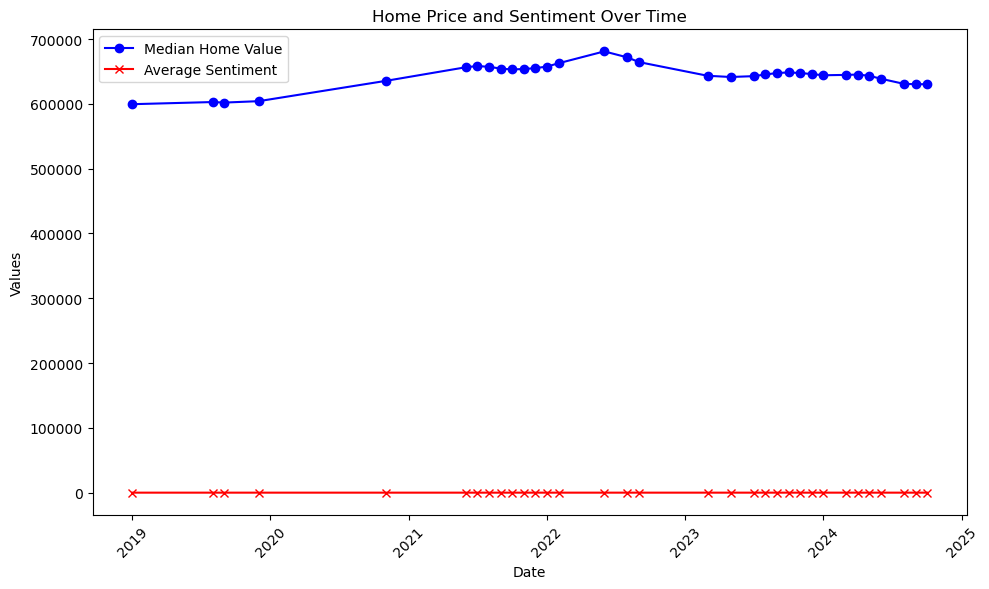

In [80]:
plt.figure(figsize=(10, 6))

# Plot Home Price
plt.plot(merged_df['EndMonth'], merged_df['MedianHomeValue'], label='Median Home Value', color='b', marker='o')

# Plot Sentiment
plt.plot(merged_df['date'], merged_df['average_sentiment'], label='Average Sentiment', color='r', marker='x')

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Home Price and Sentiment Over Time')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
import numpy as np

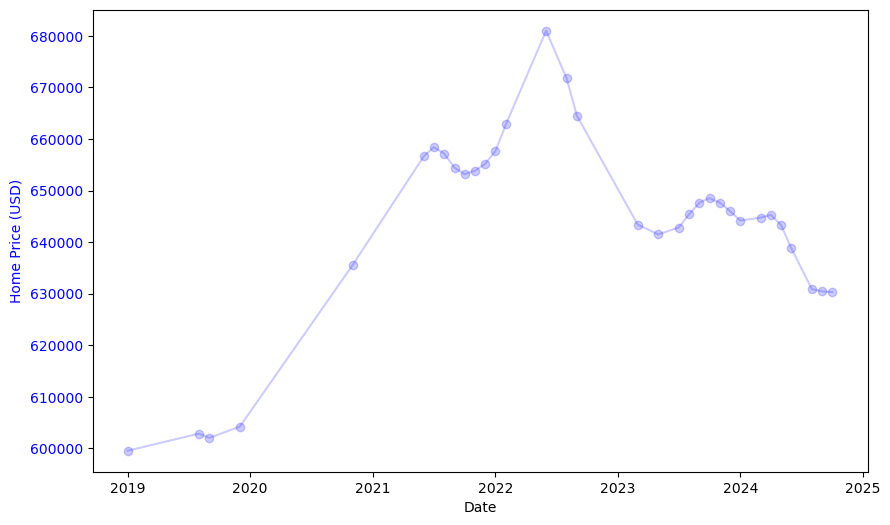

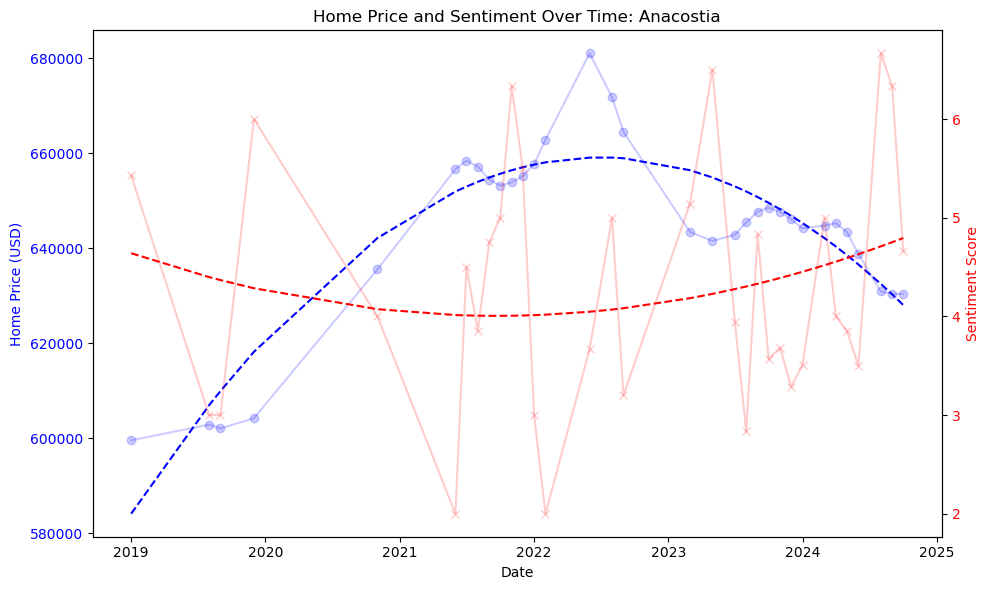

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

degree=2

# Plot Home Price (on the left y-axis)
ax1.plot(merged_df['EndMonth'], merged_df['MedianHomeValue'], color='b', marker='o', label='Median Home Value', alpha=.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price (USD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

coeff_hp = np.polyfit(merged_df['EndMonth'].astype(np.int64), merged_df['MedianHomeValue'], degree)
poly_hp = np.poly1d(coeff_hp)  # Create the polynomial function
ax1.plot(merged_df['EndMonth'], poly_hp(merged_df['EndMonth'].astype(np.int64)), 
         color='b', linestyle='--', label=f'Home Price Polynomial Fit (degree {degree})')

# Create a secondary y-axis for sentiment
ax2 = ax1.twinx()  # This creates a second y-axis sharing the same x-axis
ax2.plot(merged_df['date'], merged_df['average_sentiment'], color='r', marker='x', label='Average Sentiment', alpha=.2)
ax2.set_ylabel('Sentiment Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

coeff_sent = np.polyfit(merged_df['date'].astype(np.int64), merged_df['average_sentiment'], degree)
poly_sent = np.poly1d(coeff_sent)  # Create the polynomial function
ax2.plot(merged_df['date'], poly_sent(merged_df['date'].astype(np.int64)), 
         color='r', linestyle='--', label=f'Sentiment Polynomial Fit (degree {degree})')

# Add a title and a legend
plt.title('Home Price and Sentiment Over Time: Anacostia')

# Show the plot
fig.tight_layout()
#plt.savefig("../../figures/anacostia_HomePrice_vs_Sentiment.png", transparent=True)
#plt.show()


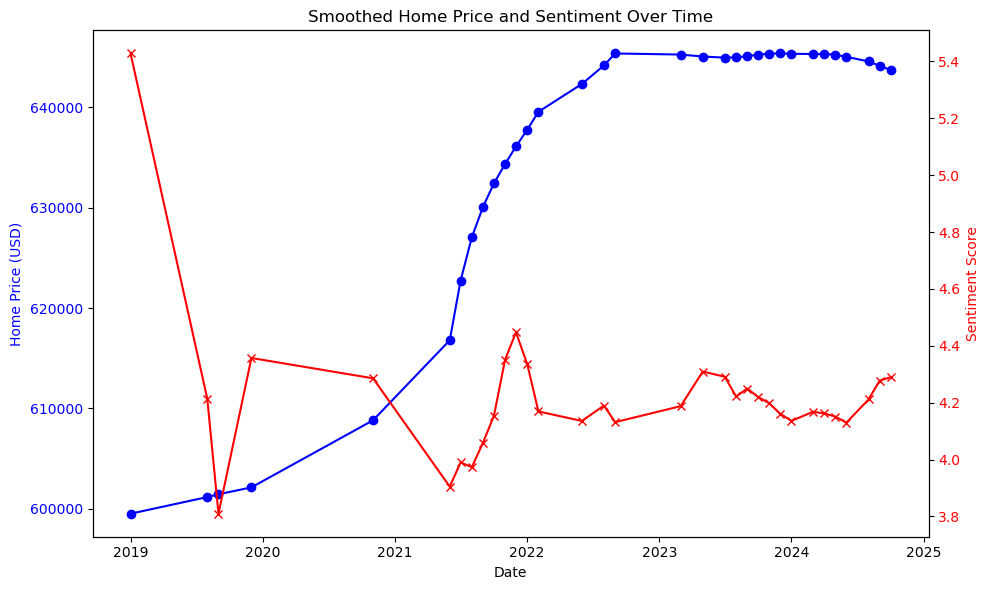

In [84]:
# Apply a moving average to smooth the lines (adjust window size as needed)
window_size = 1000  # You can adjust the window size to control the smoothing level

# Smooth the Home Price data
merged_df['smoothed_home_value'] = merged_df['MedianHomeValue'].rolling(window=window_size, min_periods=1).mean()

# Smooth the Sentiment data
merged_df['smoothed_sentiment'] = merged_df['average_sentiment'].rolling(window=window_size, min_periods=1).mean()

# Plot Home Price (on the left y-axis)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_df['EndMonth'], merged_df['smoothed_home_value'], color='b', marker='o', label='Smoothed Home Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price (USD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['smoothed_sentiment'], color='r', marker='x', label='Smoothed Sentiment')
ax2.set_ylabel('Sentiment Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and a legend
plt.title('Smoothed Home Price and Sentiment Over Time')

# Show the plot
fig.tight_layout()
plt.show()

### New plot

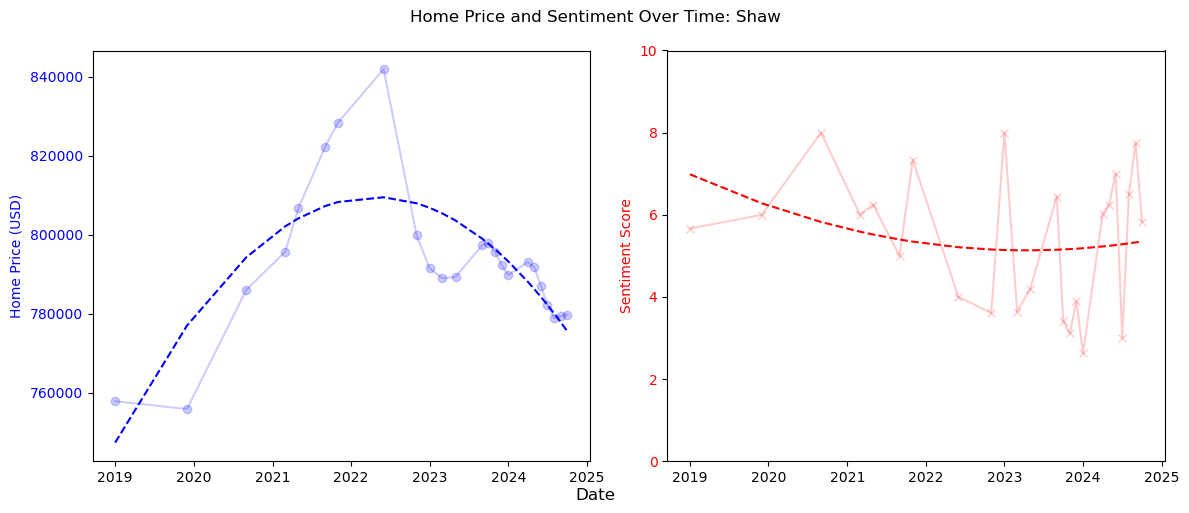

In [133]:
fig, axes = plt.subplots(1,2,figsize=(12,5), sharey=False)

degree=2

# Apply a moving average to smooth the lines (adjust window size as needed)
window_size = 1000  # You can adjust the window size to control the smoothing level

# Smooth the Home Price data
merged_df['smoothed_home_value'] = merged_df['MedianHomeValue'].rolling(window=window_size, min_periods=1).mean()

# Smooth the Sentiment data
merged_df['smoothed_sentiment'] = merged_df['average_sentiment'].rolling(window=window_size, min_periods=1).mean()


axes[0].plot(merged_df['EndMonth'], merged_df['MedianHomeValue'], color='b', marker='o', label='Median Home Value', alpha=.2)
axes[0].set_ylabel('Home Price (USD)', color='b')
axes[0].tick_params(axis='y', labelcolor='b')

coeff_hp = np.polyfit(merged_df['EndMonth'].astype(np.int64), merged_df['MedianHomeValue'], degree)
poly_hp = np.poly1d(coeff_hp)  # Create the polynomial function
axes[0].plot(merged_df['EndMonth'], poly_hp(merged_df['EndMonth'].astype(np.int64)), 
         color='b', linestyle='--', label=f'Home Price Polynomial Fit (degree {degree})')

axes[1].plot(merged_df['date'], merged_df['average_sentiment'], color='r', marker='x', label='Average Sentiment', alpha=.2)
axes[1].set_ylabel('Sentiment Score', color='r')
axes[1].set_ylim(0,10)
axes[1].tick_params(axis='y', labelcolor='r')

coeff_sent = np.polyfit(merged_df['date'].astype(np.int64), merged_df['average_sentiment'], degree)
poly_sent = np.poly1d(coeff_sent)  # Create the polynomial function
axes[1].plot(merged_df['date'], poly_sent(merged_df['date'].astype(np.int64)), 
         color='r', linestyle='--', label=f'Sentiment Polynomial Fit (degree {degree})')

plt.suptitle('Home Price and Sentiment Over Time: Shaw')
fig.text(0.5, 0, 'Date', ha='center', fontsize=12)

fig.tight_layout()
plt.savefig("../../Price_v_Sentiment_Shaw_v2")
plt.show()